# Fitness for All: Identifying Factors Affecting Regular Exercise in the U.S.

### Author: Victoria Lance

**Research Focus:** What are the key factors influencing physical activity levels among sedentary adults across the United States?

**Table of Contents:**

[1. Introduction](#1.-Introduction)

[2. Focus Areas](#2.-Focus-Areas)

[3. Analysis & Interpretation](#3.-Analysis-&-Interpretation)

[4. Conclusion](#4.-Conclusion)

[5. Challenges](#5.-Challenges)

# 1. Introduction
Imagine dedicating just 2.5 hours out of your 168 hours each week to feel better, think sharper, reduce stress, and improve sleep. The CDC recommends that all adults engage in at least 150 minutes of moderate-intensity aerobic activity per week to reduce the risk of disease, regulate blood pressure, and maintain a healthy weight. Yet, for many Americans, this recommendation remains out of reach. What factors contribute to this gap?

This research investigates the diverse and complex factors—geographic, demographic, economic, and legislative—that influence physical activity levels across the United States. These factors encompass not only physical access and cost but also broader societal influences, such as income disparities, regional infrastructure, and public policies related to fitness and health. Understanding these influences sheds light on why some states excel in fostering active lifestyles while others struggle with higher rates of inactivity and obesity.

Physical activity is not just about individual health; it has broader implications for mental well-being, social interaction, and economic outcomes, including reduced healthcare costs and increased productivity. By leveraging national datasets from the CDC this project seeks to provide a clearer picture of the factors shaping fitness accessibility and participation across the United States.

Having worked in the fitness industry for the past 8 years as both an instructor and a studio manager, overseeing both smaller and larger boutique fitness studios, I’ve seen first-hand the barriers that prevent people from making lasting lifestyle changes. Many individuals eager to prioritize their health often face obstacles like unaffordable gym memberships, limited childcare options, or rigid work schedules that prevent them from accessing fitness facilities during open hours. Working for companies that owned national fitness brands has shown me how different regions across the United States approach the fitness market. In densely populated urban areas like New York City and D.C., you can find a gym around almost every corner. However, in more remote areas, accessing a gym might mean a 30-60 minute drive—if one is available at all—and even then, it may not offer the specific classes or equipment needed.

Fitness has a transformative power that extends beyond physical health, impacting mental resilience, social connections, and overall quality of life. By exploring the factors that hinder or enable fitness access, this research aims to contribute to a better understanding of how to create a more active and healthier society. 

# 2. Focus Areas
**Geographic**

Are rural areas more affected by physical inactivity than urban areas? What regional differences exist in the availability of programs promoting physical activity in the U.S.?

**Demographics**

How does income or employment status influence access to exercise opportunities and physical activity? What role do public health policies play in promoting physical activity among diverse demographic groups?

**Cost**

To what extent does the cost of fitness facilities, equipment, or programs act as a barrier to regular physical activity? How does income level correlate with physical activity rates in the U.S.? What impact do subsidized fitness programs or public funding have on reducing cost barriers?

**Legislation**

How effective are current U.S. policies in promoting physical activity, and do they adequately address barriers to exercise for sedentary adults? Are there significant differences in physical activity rates across states with differing legislation around health and fitness? What role could new legislation play in improving access to physical activity for low-income or high-risk populations?

# 3. Analysis & Interpretation



## The Behavioral Risk Factor Surveillance System (BRFSS)  
The CDC BRFSS database tracks state data in the United States regarding health-related risk behaviors, chronic health conditions, and prevenative services. It is a telephone survey that was started in 1984 and is currently the largest continously conducted health survey system in the world. For simplicity all the state data pulled below from the BRFSS will be from the year 2023.

[Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/index.html) 

In [24]:
#import programs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

### Prevalence of Physical Inactivity By State

Survey respondents were classified as physically inactive if they responded "no" to the following question: "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"

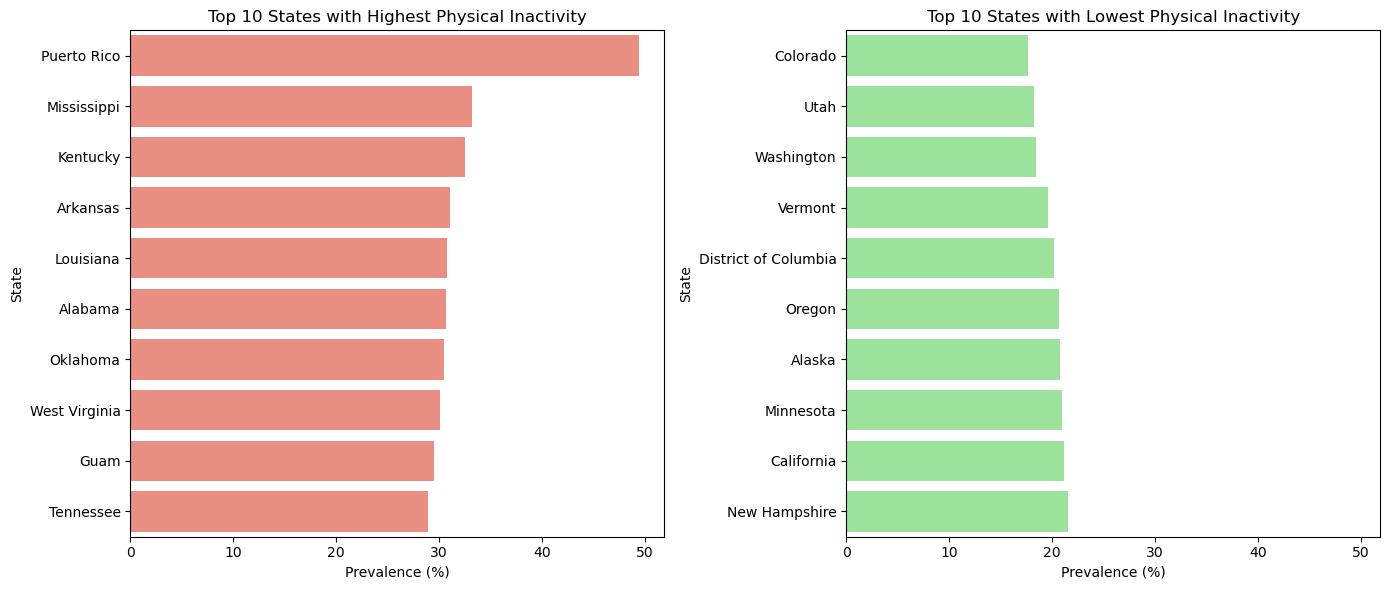

Top 10 States with Highest Physical Inactivity:
             State  Prevalence
52    Puerto Rico        49.4
24    Mississippi        33.2
17       Kentucky        32.5
3        Arkansas        31.1
18      Louisiana        30.8
0         Alabama        30.7
36       Oklahoma        30.5
48  West Virginia        30.1
51           Guam        29.5
42      Tennessee        28.9

Top 10 States with Lowest Physical Inactivity:
                    State  Prevalence
5               Colorado        17.7
44                  Utah        18.2
47            Washington        18.4
45               Vermont        19.6
8   District of Columbia        20.2
37                Oregon        20.7
1                 Alaska        20.8
23             Minnesota        21.0
4             California        21.2
29         New Hampshire        21.5


In [5]:
physical_inactivity_state = pd.read_csv('Prevalence of Physical Inactivity By State.csv')

# Drop the '95% Confidence Interval' column
physical_inactivity_state.drop(columns=['95% Confidence Interval'], inplace=True)

# Convert 'Prevalence' column to numeric, handling any non-numeric values
physical_inactivity_state['Prevalence'] = pd.to_numeric(physical_inactivity_state['Prevalence'], errors='coerce')

# Drop rows with NaN in the 'Prevalence' column
physical_inactivity_state.dropna(subset=['Prevalence'], inplace=True)

# Sort the data by 'Prevalence'
physical_inactivity_state = physical_inactivity_state.sort_values(by='Prevalence', ascending=False)

# Top and bottom 10 states
top10 = physical_inactivity_state.nlargest(10, 'Prevalence')
bottom10 = physical_inactivity_state.nsmallest(10, 'Prevalence')

# Create subplots for the bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot Top 10 States
sns.barplot(y='State', x='Prevalence', data=top10, ax=axes[0], color='salmon')
axes[0].set_title('Top 10 States with Highest Physical Inactivity')
axes[0].set_xlabel('Prevalence (%)')

# Plot Bottom 10 States
sns.barplot(y='State', x='Prevalence', data=bottom10, ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 States with Lowest Physical Inactivity')
axes[1].set_xlabel('Prevalence (%)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print Top and Bottom 10 States
print("Top 10 States with Highest Physical Inactivity:\n", top10)
print("\nTop 10 States with Lowest Physical Inactivity:\n", bottom10)

## Weight classification by Body Mass Index (BMI)

In [6]:
obesity_state = pd.read_csv('Obesity by BMI.csv')

# Remove summary rows
obesity_state = obesity_state.drop(index=range(0, 8))

# Select needed columns and rename for clarity
obesity_state_cleaned = obesity_state[['LocationDesc', 'Response', 'Data_Value']]

# Ensure there are 4 rows per state (for each obesity category)
obesity_state_reshaped = obesity_state_cleaned.pivot_table(index='LocationDesc', 
                                                          columns='Response', 
                                                          values='Data_Value', 
                                                          aggfunc='first')

# Reset index for a cleaner view
obesity_state_reshaped.reset_index(inplace=True)


# Show the cleaned DataFrame
print(obesity_state_reshaped.head())

Response LocationDesc  Normal Weight (BMI 18.5-24.9)  Obese (BMI 30.0 - 99.8)  \
0             Alabama                           26.0                     39.2   
1              Alaska                           29.9                     35.2   
2             Arizona                           31.5                     31.9   
3            Arkansas                           26.1                     40.0   
4          California                           33.7                     27.7   

Response  Overweight (BMI 25.0-29.9)  Underweight (BMI 12.0-18.4)  
0                               32.7                          2.0  
1                               33.3                          1.7  
2                               34.5                          2.2  
3                               31.8                          2.1  
4                               36.4                          2.2  


In [7]:
# Get the top 10 and bottom 10 states for each category
top_10_obese = obesity_state_reshaped[['LocationDesc', 'Obese (BMI 30.0 - 99.8)']].sort_values('Obese (BMI 30.0 - 99.8)', ascending=False).head(10)
bottom_10_obese = obesity_state_reshaped[['LocationDesc', 'Obese (BMI 30.0 - 99.8)']].sort_values('Obese (BMI 30.0 - 99.8)', ascending=True).head(10)

print("Top 10 Obese States:\n", top_10_obese)
print("\nBottom 10 Obese States:\n", bottom_10_obese)

Top 10 Obese States:
 Response   LocationDesc  Obese (BMI 30.0 - 99.8)
49        West Virginia                     41.2
24          Mississippi                     40.1
3              Arkansas                     40.0
18            Louisiana                     39.9
0               Alabama                     39.2
36             Oklahoma                     38.7
16                 Iowa                     37.8
15              Indiana                     37.8
42            Tennessee                     37.6
27             Nebraska                     36.6

Bottom 10 Obese States:
 Response          LocationDesc  Obese (BMI 30.0 - 99.8)
8         District of Columbia                     23.5
5                     Colorado                     24.9
12                      Hawaii                     26.1
21               Massachusetts                     27.4
4                   California                     27.7
32                    New York                     28.0
45                   

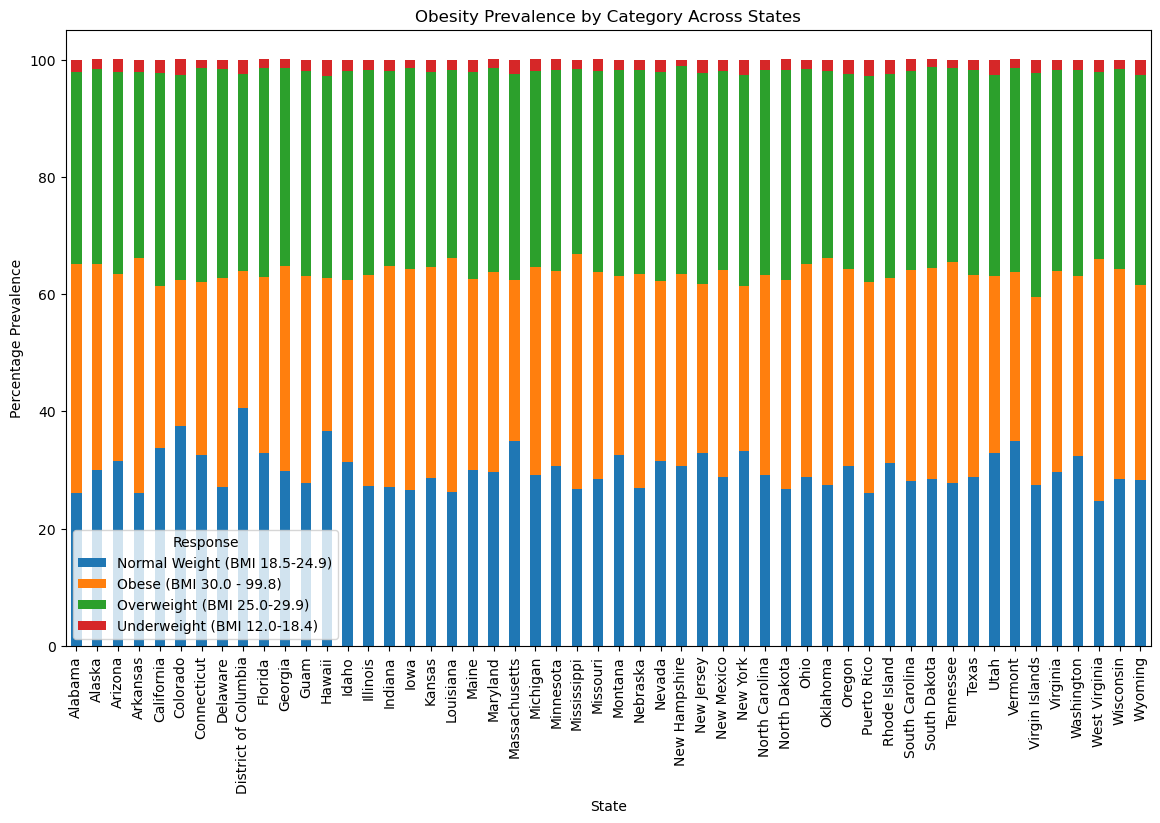

In [8]:
# Bar plot showing the obesity prevalence for each category across states
obesity_state_reshaped.set_index('LocationDesc')[['Normal Weight (BMI 18.5-24.9)', 
                                                'Obese (BMI 30.0 - 99.8)', 
                                                'Overweight (BMI 25.0-29.9)', 
                                                'Underweight (BMI 12.0-18.4)']].plot.bar(stacked=True, figsize=(14, 8))
plt.title('Obesity Prevalence by Category Across States')
plt.xlabel('State')
plt.ylabel('Percentage Prevalence')
plt.xticks(rotation=90)
plt.show()


## Exercise Participation By State

During the past month, did you participate in any physical activities? 

In [9]:
exercise_state = pd.read_csv('Exercise_State.csv')

# Remove rows 1-4 (indexing starts at 0, so we drop rows with index 0, 1, 2, 3)
exercise_state_cleaned = exercise_state.drop(index=range(0, 4))

# Remove rows where 'Response' equals 'No'
exercise_state_cleaned = exercise_state_cleaned[exercise_state_cleaned['Response'] != 'No']

# Keep only the relevant columns: 'LocationDesc', 'Response', and 'Data Value'
exercise_state_cleaned = exercise_state_cleaned[['LocationDesc', 'Response', 'Data_Value']]

# Check the first few rows to ensure the cleaning was successful
print(exercise_state_cleaned.head())

# Sort the DataFrame by 'Data Value' in descending order and get the top 10 states
top_10_states = exercise_state_cleaned.sort_values('Data_Value', ascending=False).head(10)

# Sort the DataFrame by 'Data Value' in ascending order and get the bottom 10 states
bottom_10_states = exercise_state_cleaned.sort_values('Data_Value', ascending=True).head(10)

# Remove the 'Response' column from both top and bottom 10 DataFrames
top_10_e_states = top_10_states.drop(columns=['Response'])
bottom_10_e_states = bottom_10_states.drop(columns=['Response'])

# Display the top 10 states
print("Top 10 States by Exercise Participation Rate:\n", top_10_e_states)

# Display the bottom 10 states
print("\nBottom 10 States by Exercise Participation Rate:\n", bottom_10_e_states)

   LocationDesc Response  Data_Value
4       Alabama      Yes        70.9
6        Alaska      Yes        79.1
8       Arizona      Yes        78.7
10     Arkansas      Yes        67.5
12   California      Yes        77.1
Top 10 States by Exercise Participation Rate:
             LocationDesc  Data_Value
20  District of Columbia        84.8
88                  Utah        83.8
14              Colorado        82.5
94            Washington        81.9
76                Oregon        80.6
54               Montana        80.4
90               Vermont        79.7
6                 Alaska        79.1
28                 Idaho        78.9
60         New Hampshire        78.8

Bottom 10 States by Exercise Participation Rate:
        LocationDesc  Data_Value
104     Puerto Rico        47.9
50      Mississippi        66.6
10         Arkansas        67.5
96    West Virginia        68.0
106  Virgin Islands        68.8
74         Oklahoma        69.0
38        Louisiana        69.9
4           Alaba

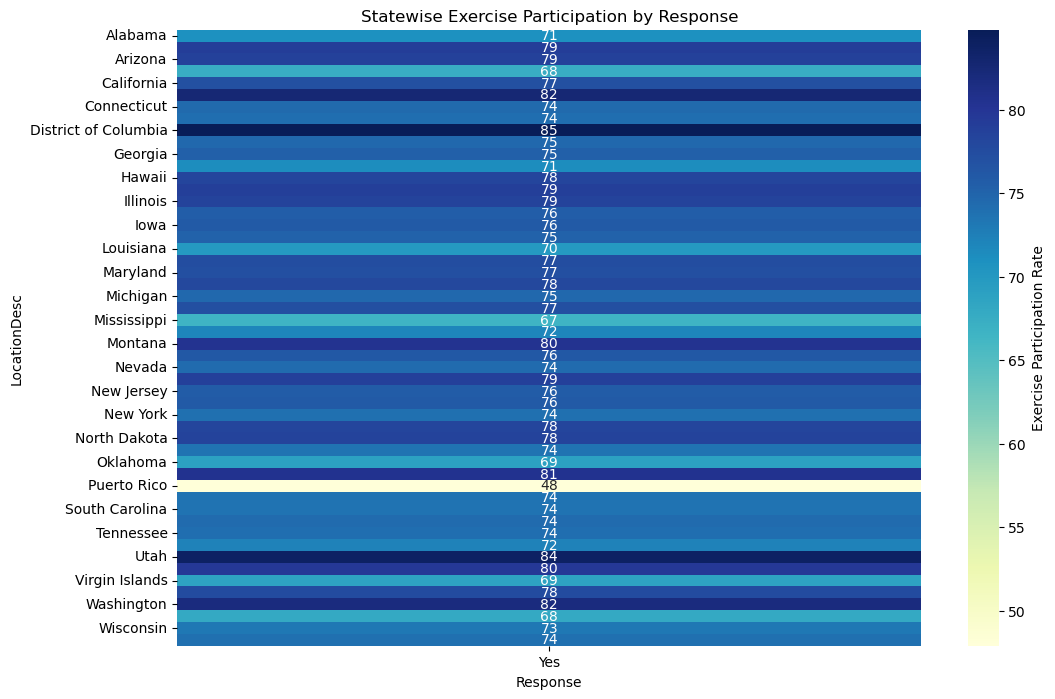

In [10]:
pivot_data = exercise_state_cleaned.pivot_table(index='LocationDesc', columns='Response', values='Data_Value')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Exercise Participation Rate'})
plt.title('Statewise Exercise Participation by Response')
plt.show()


## Aerobic Activity By State 2023
Did you participate in 150 minutes or more of Aerobic Physical Activity per week?

These recommendations are based on the Physical Activity Guidelines for Americans, 2nd edition, published by the U.S. Department of Health and Human Services, Office of Disease Prevention and Health Promotion.  The adult reccomendation is to get at least 150 minutes per week of moderate-intensity aerobic activity.

In [11]:
aerobic_state = pd.read_csv('Aerobic Activity.csv')

# Drop rows 1 and 2 (adjusting for 0-based indexing, these are rows 0 and 1)
aerobic_state_cleaned = aerobic_state.drop(index=[0, 1])

# Keep only the 'LocationDesc' and 'Data Value' columns
aerobic_state_cleaned = aerobic_state_cleaned[['LocationDesc', 'Data_Value']]

# Keep only state information
aerobic_state_cleaned = aerobic_state_cleaned.iloc[:52]

# Sort the DataFrame by 'Data_Value' in descending order
sorted_aerobic_state = aerobic_state_cleaned.sort_values('Data_Value', ascending=False)

# Get the top 10 states
top_10_a_states = sorted_aerobic_state.head(10)

# Get the bottom 10 states
bottom_10_a_states = sorted_aerobic_state.tail(10)

# Display the results
print("Top 10 States:")
print(top_10_a_states)

print("\nBottom 10 States:")
print(bottom_10_a_states)

Top 10 States:
            LocationDesc  Data_Value
10  District of Columbia        67.8
38                Oregon        67.0
7               Colorado        67.0
47            Washington        66.5
45               Vermont        66.5
27               Montana        66.3
20                 Maine        66.1
44                  Utah        65.1
3                 Alaska        65.0
14                 Idaho        64.7

Bottom 10 States:
      LocationDesc  Data_Value
2          Alabama        56.3
53  Virgin Islands        55.4
51            Guam        55.3
19       Louisiana        54.5
26        Missouri        53.9
48   West Virginia        53.1
5         Arkansas        52.8
25     Mississippi        51.2
37        Oklahoma        51.1
52     Puerto Rico        33.9


## Demographics 

In [12]:
#income
income_df = pd.read_csv('State Income.csv')

# Keep only the specified columns
income_df = income_df.loc[:, ['LocationDesc', 'Response', 'Data_Value']]

# Select needed columns and rename for clarity
income_df_cleaned = income_df[['LocationDesc', 'Response', 'Data_Value']]

# Ensure there are 7 rows per state (for each obesity category)
income_df_reshaped = income_df_cleaned.pivot_table(index='LocationDesc', 
                                                          columns='Response', 
                                                          values='Data_Value', 
                                                          aggfunc='first')

# Reset index for a cleaner view
income_df_reshaped.reset_index(inplace=True)
print(income_df_reshaped.head())

Response LocationDesc  $100,000 - 199,999  $15,000 - 24,999  $200,000+  \
0             Alabama                20.2               9.1        5.6   
1              Alaska                26.6               6.5        7.1   
2             Arizona                22.3               9.5        6.6   
3            Arkansas                14.7              13.4        4.1   
4          California                22.9              11.0       12.3   

Response  $25,000 - 34,999  $35,000 -  49,999  $50,000 - 99,999  \
0                     11.2               16.6              30.3   
1                      9.0               11.2              35.0   
2                     12.4               13.0              30.2   
3                     16.2               16.1              27.6   
4                     11.5               11.4              23.8   

Response  Less than $15,000  
0                       6.9  
1                       4.7  
2                       6.0  
3                       8.0  
4 

In [13]:
top_10_highest = income_df_reshaped[['LocationDesc', '$200,000+']].sort_values('$200,000+', ascending=False).head(10)
top_10_lowest = income_df_reshaped[['LocationDesc', 'Less than $15,000']].sort_values('Less than $15,000', ascending=False).head(10)

# Display the results
print("Top Income States:")
print(top_10_highest)

print("\nLowest Income States:")
print(top_10_lowest)

Top Income States:
Response          LocationDesc  $200,000+
8         District of Columbia       22.4
21               Massachusetts       15.5
6                  Connecticut       14.6
30                  New Jersey       14.0
20                    Maryland       13.5
4                   California       12.3
48                  Washington       11.9
47                    Virginia       11.2
5                     Colorado       11.0
29               New Hampshire       11.0

Lowest Income States:
Response          LocationDesc  Less than $15,000
38                 Puerto Rico               32.8
46              Virgin Islands               10.0
18                   Louisiana                8.8
3                     Arkansas                8.0
8         District of Columbia                7.5
24                 Mississippi                7.3
32                    New York                7.3
31                  New Mexico                7.1
49               West Virginia                

In [14]:
#employment
employment_df = pd.read_csv('Employment State.csv')

# Keep only the specified columns
employment_df = employment_df.loc[:, ['LocationDesc', 'Response', 'Data_Value']]

# Select needed columns and rename for clarity
employment_df_cleaned = employment_df[['LocationDesc', 'Response', 'Data_Value']]

# Ensure there are 7 rows per state (for each obesity category)
employment_df_reshaped = employment_df_cleaned.pivot_table(index='LocationDesc', 
                                                          columns='Response', 
                                                          values='Data_Value', 
                                                          aggfunc='first')

# Reset index for a cleaner view
employment_df_reshaped.reset_index(inplace=True)
print(employment_df_reshaped.head())

Response LocationDesc Employed Homemaker No work &gt;yr No work&lt; yr  \
0             Alabama     46.2       4.5            1.8            2.5   
1              Alaska     50.2       5.5            2.8            3.6   
2             Arizona     44.9       6.7              3            2.8   
3            Arkansas     44.2       5.9              2            2.2   
4          California     46.3       5.9            3.1            3.8   

Response Retired Self-employed Student Unable to work  
0           22.8           8.8     3.5            9.9  
1           18.3          11.2       4            4.4  
2             24             9     4.5            5.3  
3           22.4           8.3     4.4           10.6  
4           18.6          10.6     6.1            5.6  


In [15]:
# Get the top 10 and bottom 10 states for each category
top_10_employed = employment_df_reshaped[['LocationDesc', 'Employed']].sort_values('Employed', ascending=False).head(10)
bottom_10_employed = employment_df_reshaped[['LocationDesc', 'Employed']].sort_values('Employed', ascending=True).head(10)

print("Top 10 Employed States:\n", top_10_employed)
print("\nBottom 10 Employed States:\n", bottom_10_employed)

Top 10 Employed States:
 Response          LocationDesc Employed
8         District of Columbia     60.6
44                        Utah     54.6
11                        Guam     54.3
27                    Nebraska     53.5
34                North Dakota     52.5
17                      Kansas     52.2
16                        Iowa     51.8
23                   Minnesota     51.7
41                South Dakota     51.5
12                      Hawaii     51.5

Bottom 10 Employed States:
 Response    LocationDesc Employed
38           Puerto Rico     35.7
9                Florida     40.3
49         West Virginia     43.1
40        South Carolina     43.7
24           Mississippi     43.8
26               Montana     43.9
3               Arkansas     44.2
31            New Mexico     44.2
18             Louisiana     44.4
19                 Maine     44.7


## Comparison of BRFSS State Data

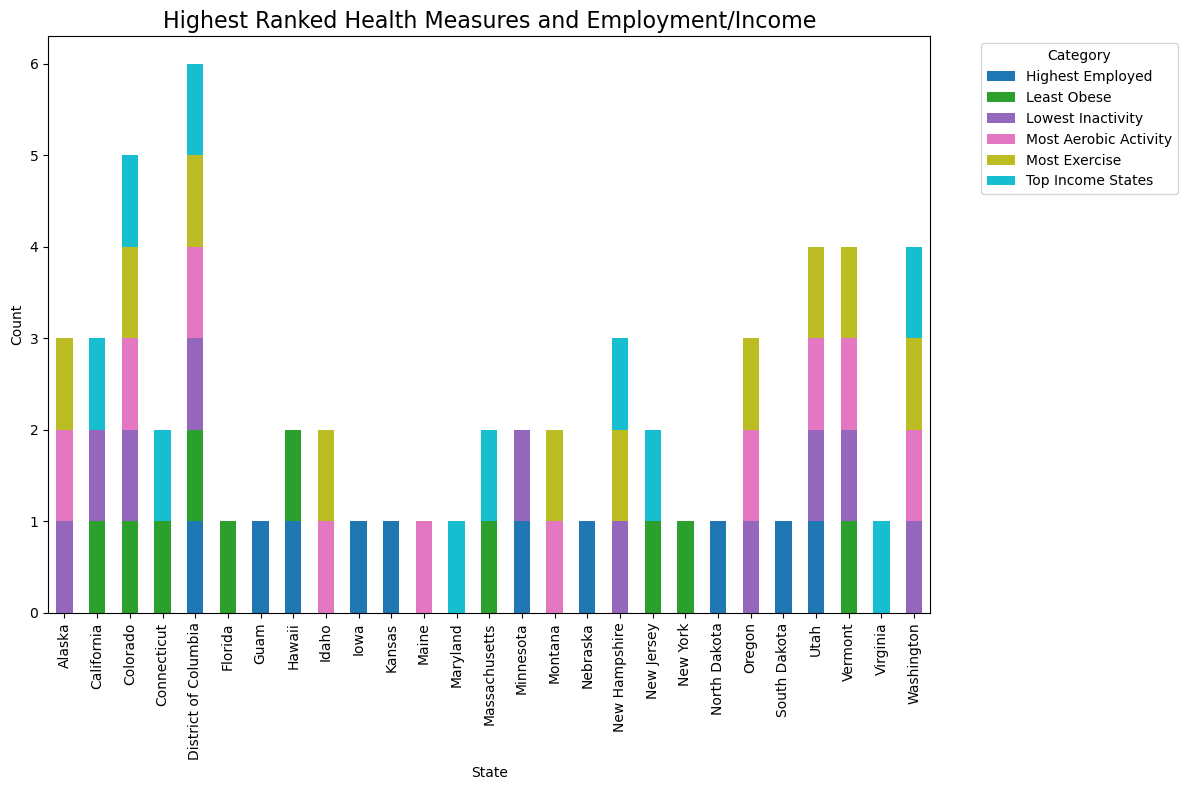

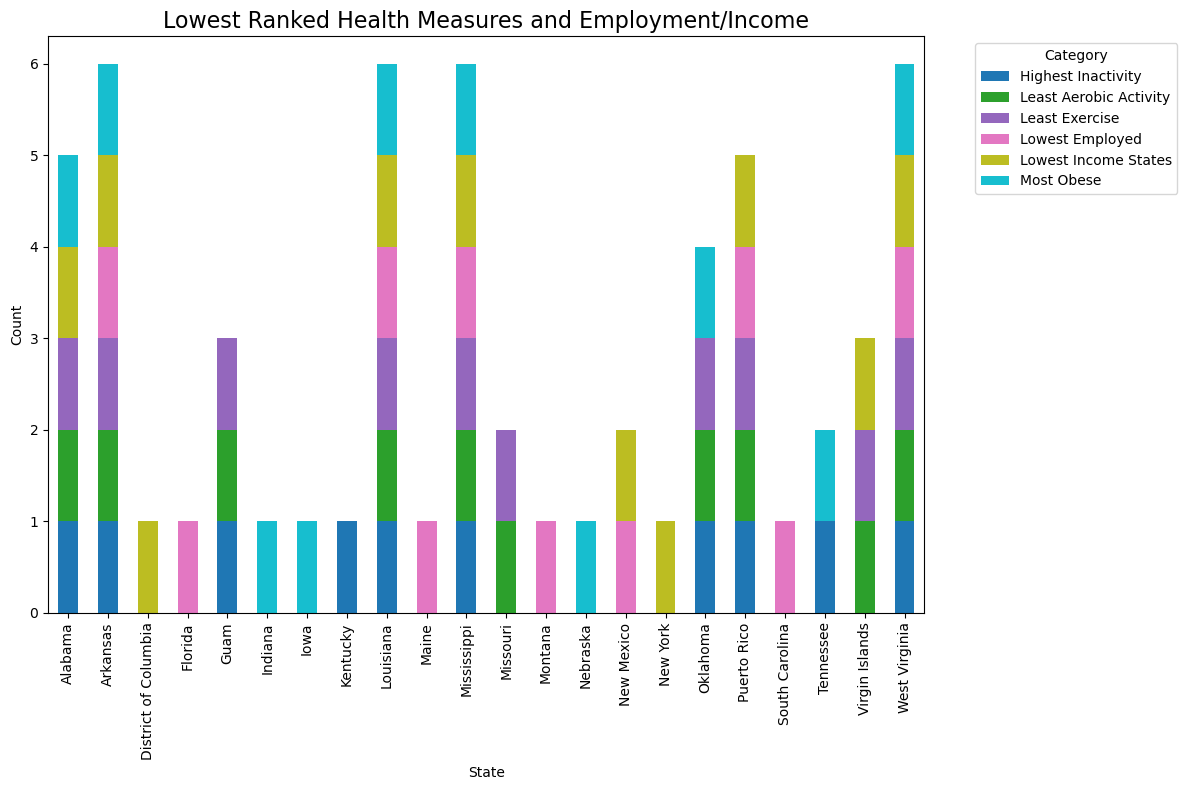

In [16]:
# Read the dataset
comparison_of_states = pd.read_csv('Comparison of States.csv')

# Updated group categories including the new columns
group1_cols = ['Lowest Inactivity', 'Least Obese', 'Most Exercise', 'Most Aerobic Activity', 
               'Top Income States', 'Highest Employed ']  # Added 'Top Income' and 'Highest Employed'
group2_cols = ['Highest Inactivity', 'Most Obese', 'Least Exercise', 'Least Aerobic Activity', 
               'Lowest Income States', 'Lowest Employed']  # Added 'Lowest Income' and 'Lowest Employed'

# Function to visualize the groups as stacked bar charts
def visualize_groups(df, columns, title):
    # Melt the DataFrame for easier visualization
    melted_df = df.melt(id_vars='Rating Number', value_vars=columns, 
                        var_name='Category', value_name='State')
    
    # Create a pivot table to count occurrences of states for each category
    pivot_df = melted_df.groupby(['State', 'Category']).size().unstack(fill_value=0)

    # Create a stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
    plt.title(title, fontsize=16)
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Visualize the first group as a stacked bar chart
visualize_groups(comparison_of_states, group1_cols, 'Highest Ranked Health Measures and Employment/Income')

# Visualize the second group as a stacked bar chart
visualize_groups(comparison_of_states, group2_cols, 'Lowest Ranked Health Measures and Employment/Income')


## Legislation

This dataset contains policy data for 50 US states from 2001 to 2017. Data include information related to state legislation and regulations on nutrition, physical activity, and obesity.

[CDC nutrition, physical activity, and obesity - legislation](https://catalog.data.gov/dataset/cdc-nutrition-physical-activity-and-obesity-legislation) 

In [17]:
legislation_df = pd.read_csv('CDC_Legislation.csv')
legislation_df.head()

,Year,LocationAbbr,LocationDesc,HealthTopic,PolicyTopic,Setting,Title,Status,Citation,StatusAltValue,EnactedDate,EffectiveDate
0,2010,NY,New York,Obesity,Incentives,Community,State Fiscal Plan,Dead,S6610,3,NaN,NaN
1,2011,WV,West Virginia,Nutrition,Appropriations,Community,Sales Tax on Food,Dead,H2977,3,NaN,NaN
2,2011,MA,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,Community,Pedestrian Safety,Dead,SD19,3,NaN,NaN
3,2010,NC,North Carolina,Obesity,Menu Labeling,Community,Governors Budget,Dead,H1793,3,NaN,NaN
4,2011,FL,Florida,Physical Activity,"Parks, Recreation and Trails",School/After School,Chronic Diseases<br>,Dead,S526,3,1/1/2012 0:00,NaN


In [18]:
# Group by 'LocationDesc' and calculate the counts
proposed_df = legislation_df.groupby('LocationDesc').agg(
    Proposed_Legislation=('LocationDesc', 'size'),  # Count occurrences of each state
    Enacted=('EnactedDate', lambda x: x.notna().sum()),  # Count non-NaN 'EnactedDate'
    Effective=('EffectiveDate', lambda x: x.notna().sum())  # Count non-NaN 'EffectiveDate'
).reset_index()

# Rename 'LocationDesc' to 'State'
proposed_df.rename(columns={'LocationDesc': 'State'}, inplace=True)

# Display the result
print(proposed_df)

                   State  Proposed_Legislation  Enacted  Effective
0                Alabama                   411      174         13
1                 Alaska                    68       48          1
2                Arizona                   249      108          1
3               Arkansas                   435      339         46
4             California                  1698      702         54
5               Colorado                   415      299          1
6            Connecticut                   507      267          8
7               Delaware                   180      139          6
8   District of Columbia                   694      470         48
9                Florida                   953      273         10
10               Georgia                   421      259         24
11                Hawaii                  2116      387         13
12                 Idaho                   228      138          0
13              Illinois                  1278      668       

In [20]:
# Sort the DataFrame by the 'Effective' column in descending order for top 10
top_10_effective = proposed_df.sort_values(by='Effective', ascending=False).head(10)

# Sort the DataFrame by the 'Effective' column in ascending order for bottom 10
bottom_10_effective = proposed_df.sort_values(by='Effective', ascending=True).head(10)

# Display the top 10 and bottom 10 states for 'Effective'
print("\nStates with the Most Legislation")
print(top_10_effective[['State', 'Effective']])

print("\nStates with the Least Legislation")
print(bottom_10_effective[['State', 'Effective']])


States with the Most Legislation
                   State  Effective
4             California         54
8   District of Columbia         48
3               Arkansas         46
39          Rhode Island         42
20              Maryland         35
30            New Jersey         34
13              Illinois         33
21         Massachusetts         32
18             Louisiana         30
22              Michigan         28

States with the Least Legislation
           State  Effective
49     Wisconsin          0
19         Maine          0
41  South Dakota          0
15          Iowa          0
12         Idaho          0
1         Alaska          1
2        Arizona          1
5       Colorado          1
14       Indiana          2
46      Virginia          2


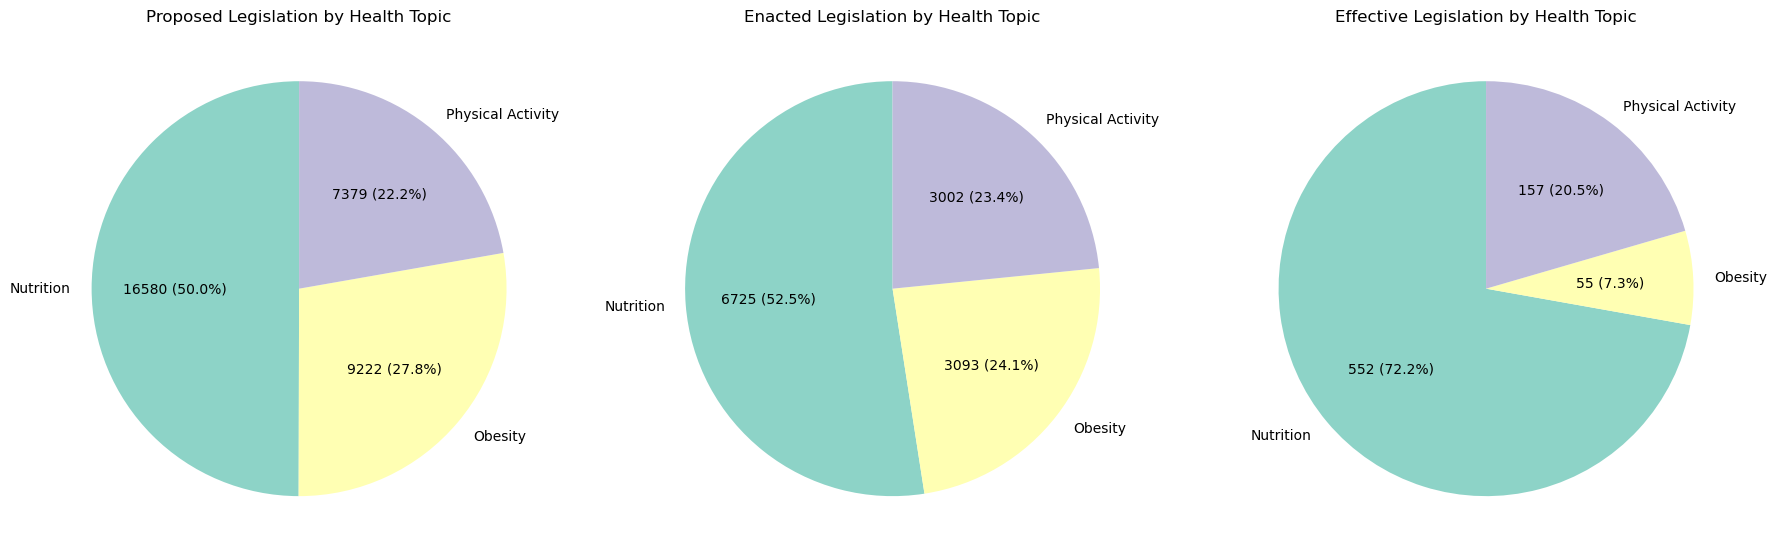

In [21]:
# Group by 'HealthTopic' and calculate the counts
health_topic_df = legislation_df.groupby('HealthTopic').agg(
    Proposed_Legislation=('HealthTopic', 'size'),  # Count occurrences of each health topic
    Enacted=('EnactedDate', lambda x: x.notna().sum()),  # Count non-NaN 'EnactedDate'
    Effective=('EffectiveDate', lambda x: x.notna().sum())  # Count non-NaN 'EffectiveDate'
).reset_index()

# Custom function to display both count and percentage in the pie chart
def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

# Plotting Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for pie charts

# Plot Proposed Legislation Pie Chart
axes[0].pie(health_topic_df['Proposed_Legislation'], 
            labels=health_topic_df['HealthTopic'], 
            autopct=lambda pct: func(pct, health_topic_df['Proposed_Legislation']), 
            startangle=90, 
            colors=sns.color_palette("Set3", len(health_topic_df)))
axes[0].set_title('Proposed Legislation by Health Topic')

# Plot Enacted Pie Chart
axes[1].pie(health_topic_df['Enacted'], 
            labels=health_topic_df['HealthTopic'], 
            autopct=lambda pct: func(pct, health_topic_df['Enacted']), 
            startangle=90, 
            colors=sns.color_palette("Set3", len(health_topic_df)))
axes[1].set_title('Enacted Legislation by Health Topic')

# Plot Effective Pie Chart
axes[2].pie(health_topic_df['Effective'], 
            labels=health_topic_df['HealthTopic'], 
            autopct=lambda pct: func(pct, health_topic_df['Effective']), 
            startangle=90, 
            colors=sns.color_palette("Set3", len(health_topic_df)))
axes[2].set_title('Effective Legislation by Health Topic')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
# Remove rows where 'EffectiveDate' is NaN
effective_only = legislation_df.dropna(subset=['EffectiveDate']).copy()

effective_only.head()

,Year,LocationAbbr,LocationDesc,HealthTopic,PolicyTopic,Setting,Title,Status,Citation,StatusAltValue,EnactedDate,EffectiveDate
108,2013,OR,Oregon,Nutrition,Agriculture and Farming,Community,Uses Authorized in Forest Zones,Enacted,35184,1,1/1/2013 0:00,1/1/2013 0:00
112,2014,NJ,New Jersey,Physical Activity,Appropriations,Community,Administrative Rules for Fees,Enacted,20399,1,12/15/2014 0:00,1/20/2015 0:00
163,2013,PA,Pennsylvania,Nutrition,Initiatives and Programs,Community,Hunger Action Month,Enacted,SR194,1,9/25/2013 0:00,9/25/2013 0:00
204,2013,RI,Rhode Island,Obesity,Disparities/Equity,Medical and/or Hospital,Rite Care Program,Enacted,5111,1,1/1/2013 0:00,1/1/2013 0:00
214,2013,AR,Arkansas,Nutrition,Disparities/Equity,Community,Community Services Block Grant State Plan,Enacted,6458,1,1/1/2013 0:00,1/1/2013 0:00


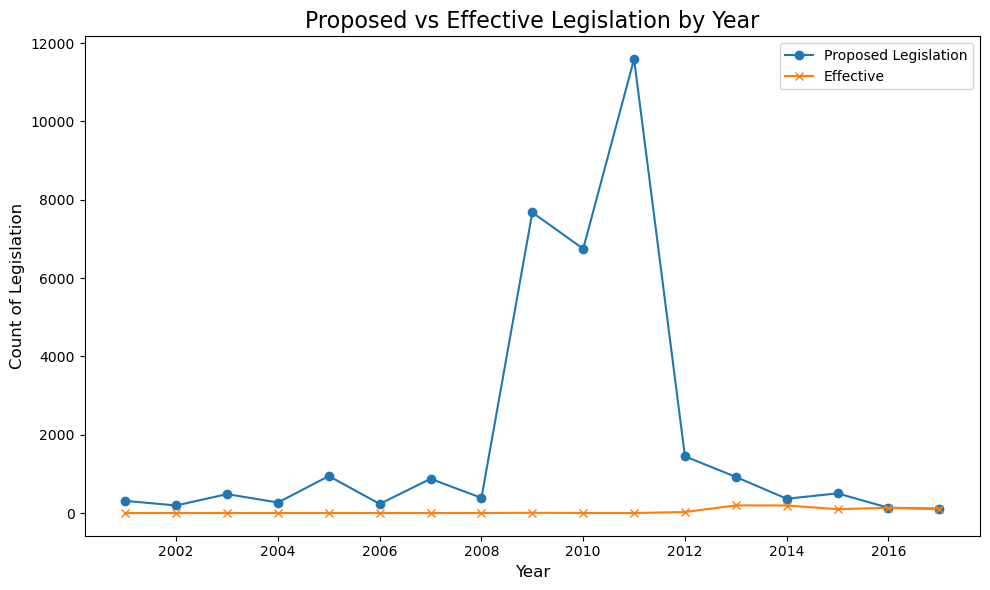

In [23]:
# Convert 'EffectiveDate' to datetime format
effective_only['EffectiveDate'] = pd.to_datetime(effective_only['EffectiveDate'], errors='coerce')

# Extract the year from 'EffectiveDate'
effective_only['EffectiveYear'] = effective_only['EffectiveDate'].dt.year

# Group by 'Year' in the original 'legislation_df' for the Proposed Legislation count
proposed_legislation_count = legislation_df.groupby('Year').size().reset_index(name='Proposed_Legislation')

# Group by 'EffectiveYear' in 'effective_only' for the Effective count
effective_count = effective_only.groupby('EffectiveYear').size().reset_index(name='Effective')

# Merge both dataframes on the year, ensuring we keep all 'Year' values even if no match
summary_df = pd.merge(proposed_legislation_count, effective_count, left_on='Year', right_on='EffectiveYear', how='outer')

# Fill any missing values with 0 (if a year has no entries in either 'Proposed_Legislation' or 'Effective')
summary_df.fillna(0, inplace=True)

# Convert the 'Proposed_Legislation' and 'Effective' columns to integers
summary_df['Proposed_Legislation'] = summary_df['Proposed_Legislation'].astype(int)
summary_df['Effective'] = summary_df['Effective'].astype(int)

# Explicitly convert 'Year' to integers to remove any float formatting
summary_df['Year'] = summary_df['Year'].astype(int)

# Drop the last row by index (index 17 in your case)
summary_df = summary_df.drop(index=17)

# Plotting the line graph with 'Year' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Year'], summary_df['Proposed_Legislation'], label='Proposed Legislation', marker='o')
plt.plot(summary_df['Year'], summary_df['Effective'], label='Effective', marker='x')

# Adding labels and title
plt.title('Proposed vs Effective Legislation by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Legislation', fontsize=12)

# Displaying the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# 4. Conclusion

This research explored the key factors shaping physical activity levels across the United States. Through an analysis of geographic, demographic, economic, and legislative influences, the findings reveal significant disparities in health outcomes across states and territories, offering valuable insights into the underlying contributors to these differences.

### Key Findings

#### Geographic Analysis:
States in the southeastern U.S., including Arkansas, Louisiana, Mississippi, West Virginia, Alabama, and Oklahoma, consistently ranked among the top 10 for unhealthy measures such as highest inactivity, least aerobic activity, least exercise, and highest obesity rates. Conversely, Colorado, D.C., and Vermont were consistently in the top 10 for healthy measures such as lowest inactivity, most aerobic activity, most exercise, and least obesity. Other states Washington, Utah, Oregon, and Alaska also ranked highly for three of the four healthy measures. These trends highlight significant regional differences in health behaviors.

#### Demographic Insights:
Demographic data revealed strong correlations between income, employment, and health measures. States like Arkansas, Louisiana, Mississippi, and West Virginia, which performed poorly in health metrics, were also among the 10 states with the lowest income and employment levels. Puerto Rico displayed a similar pattern, ranking in the top 10 for three unhealthy measures despite not being included in income and employment rankings. On the other hand, D.C. emerged as a notable outlier, ranking highly in all four healthy measures and leading in income and employment, underscoring the role of socioeconomic factors in health outcomes.

#### Costs of Physical Activity:
Standardized data on the costs of accessing physical activity remains limited. Physical activity spans a broad spectrum, from free activities like walking to costlier options such as gym memberships or specialized fitness classes. The financial barriers to structured exercise often make it inaccessible to many Americans. A study published in the Journal of the American Heart Association estimated that physical inactivity costs the U.S. economy approximately 28 billion dollars annually in healthcare expenses and lost productivity. In contrast, individuals who maintain an active lifestyle may save up to 2,500 dollars annually in healthcare costs due to reduced risk of chronic diseases like obesity, diabetes, and cardiovascular conditions (Reynolds, 2016). These figures underscore the potential economic benefits of promoting accessible and affordable physical activity options. 

Recognizing the financial barriers to physical activity, insurance providers and healthcare organizations have introduced initiatives to increase accessibility. For instance, Renew Active by UnitedHealthcare offers Medicare Advantage plan members no-cost access to gym memberships, fitness classes, and even virtual exercise options. Similar programs, such as SilverSneakers, target older adults, encouraging them to remain active and reduce healthcare expenditures through preventive health measures. While these programs are beneficial, they remain limited to specific populations and do not address access disparities for younger or uninsured individuals.

#### Legislation:
An analysis of state legislation on nutrition, physical activity, and obesity revealed that while nutrition policies accounted for 50% of proposed bills, physical activity and obesity were less prioritized, with enactment rates of only 21% and 7%, respectively. A spike in proposed legislation occurred between 2008-2012, but enactment rates remained steady. The analysis suggests that even states with extensive legislative activity, such as New York, struggle to enact and implement meaningful changes. No clear relationship was observed between legislation and health outcomes, indicating a potential gap between policy and practice.

### Final Thoughts
The findings highlight the complex interplay of factors that hinder physical activity in the United States. Geographic and demographic disparities emphasize the need for tailored interventions addressing regional and socioeconomic challenges. While physical inactivity imposes significant economic costs, programs aimed at reducing these barriers can offer substantial health and financial benefits. Finally, the disconnect between proposed legislation and measurable health outcomes highlights an opportunity to refine policy efforts to achieve greater impact.

This research provides a foundation for further exploration and discussion, with the ultimate goal of promoting a more active, healthier population across the United States.

# 5. Challenges
**Confounding Variables:** Economic, social, and environmental factors may interact in a complex way making it difficult to truly isolate the impact of specific barriers. For example, the interplay between income, access to recreational spaces, and cultural norms can obscure causal relationships.

**Inconsistent Reporting:** There might not be consistent reporting across the United States by region. There may also be inconsistent data due to self-reported activity leading to biased findings.

**Representativeness and Bias:** Many datasets lack adequate representation of marginalized or hard-to-reach populations, such as those living in rural areas or within underserved communities. Additionally, aggregated state-level data may obscure localized barriers, such as urban-rural disparities or community-specific challenges. Acknowledging and addressing these biases is crucial for an objective analysis.

**Data Gaps:** There is limited availability of standardized data on some key factors, such as the true costs associated with fitness activities or the effectiveness of legislative measures in improving physical activity rates.

These challenges underscore the importance of critical evaluation, thoughtful methodology, and transparency in data interpretation to ensure the findings provide meaningful and actionable insights.

## 6. Citations


American Heart Association recommendations for physical activity in adults and kids. www.heart.org. (2024, January 19). https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults 


Centers for Disease Control and Prevention. (2024, September 27). Behavioral risk factor surveillance system. Centers for Disease Control and Prevention. https://www.cdc.gov/brfss/index.html 

Physical activity guidelines for Americans. (n.d.). https://odphp.health.gov/our-work/nutrition-physical-activity/physical-activity-guidelines 

Publisher Centers for Disease Control and Prevention. (2023, August 26). U.S. Department of Health & Human Services - CDC nutrition, physical activity, and obesity - legislation. Catalog. https://catalog.data.gov/dataset/cdc-nutrition-physical-activity-and-obesity-legislation 


Reynolds, G. (2016, September 7). What’s the value of exercise? $2,500. The New York Times. https://www.nytimes.com/2016/09/07/well/move/whats-the-value-of-exercise-2500.html 


Sharma, A., Madaan, V., & Petty, F. D. (2006). Exercise for mental health. Primary care companion to the Journal of clinical psychiatry. https://pmc.ncbi.nlm.nih.gov/articles/PMC1470658/ 
 
